In [1]:
#import the modulus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [91]:
data = pd.read_csv('predictive_maintenance.csv')
data

,UDI,Product_ID,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [3]:
data.head()

,UDI,Product_ID,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
data.tail()

,UDI,Product_ID,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target,failure_type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [5]:
data.columns

Index(['UDI', 'Product_ID', 'Type', 'air_temperature', 'process_temperature',
       'rotational_speed ', 'torque ', 'tool_wear ', 'target', 'failure_type'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Product_ID           10000 non-null  object 
 2   Type                 10000 non-null  object 
 3   air_temperature      10000 non-null  float64
 4   process_temperature  10000 non-null  float64
 5   rotational_speed     10000 non-null  int64  
 6   torque               10000 non-null  float64
 7   tool_wear            10000 non-null  int64  
 8   target               10000 non-null  int64  
 9   failure_type         10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
data.describe()

,UDI,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [8]:
data.shape

(10000, 10)

In [9]:
data.isnull().sum()

UDI                    0
Product_ID             0
Type                   0
air_temperature        0
process_temperature    0
rotational_speed       0
torque                 0
tool_wear              0
target                 0
failure_type           0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.drop(['UDI','Product_ID'],axis = 1,inplace=True)

In [12]:
data['failure_type'].value_counts()

failure_type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [13]:
data['target'].value_counts()

target
0    9661
1     339
Name: count, dtype: int64

In [14]:
#the no failure values in target column is not equal to No Failure values in failure_type there are some miss observations
data_failure = data.loc[(data.failure_type != 'No Failure') & (data.target == 0)]
data_failure

,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target,failure_type
1221,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [15]:
#updating the target column as 1 
data['target'] = np.where(data['failure_type'] == 'Random Failures', 1, data['target'])
data['target'].value_counts()

target
0    9643
1     357
Name: count, dtype: int64

In [16]:
data['failure_type'].value_counts()

failure_type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [17]:
#still some miss observations are there
failure_type_error = data[(data['failure_type'] == 'No Failure') & (data['target'] != 0)]
failure_type_error

,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target,failure_type
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


In [18]:
failure_type_error['target'] = 0
data.update(failure_type_error)
data['target'] = data['target'].astype('int')
data.head()

,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target,failure_type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [19]:
data['target'].value_counts()

target
0    9652
1     348
Name: count, dtype: int64

In [20]:
data['failure_type'].value_counts() # validation Now our data is ready to be explored

failure_type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

Explorartory Data Analysis

Text(0.5, 1.0, 'Process Temperature Distribution')

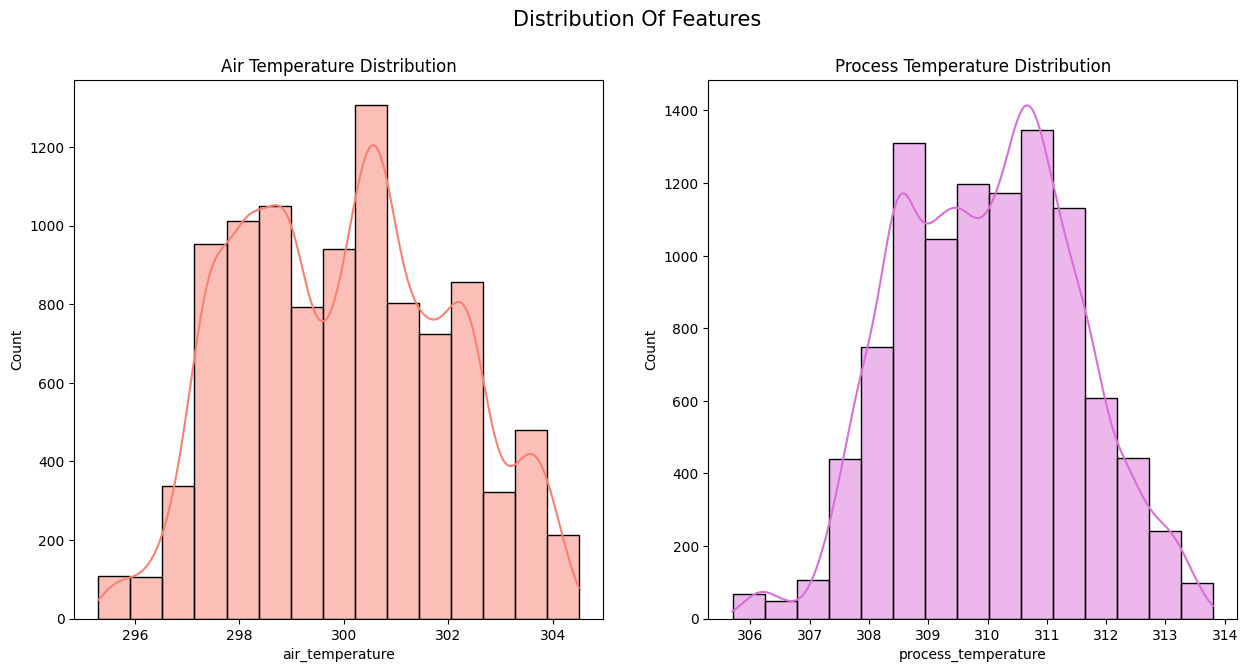

In [21]:
figure, axis = plt.subplots(1, 2, figsize=(15,7))

figure.suptitle('Distribution Of Features', fontsize=15)

sns.histplot(data, x='air_temperature', bins= 15, kde=True, ax=axis[0],color ='salmon')
axis[0].set_title('Air Temperature Distribution')


sns.histplot(data, x='process_temperature', bins= 15, kde=True, ax=axis[1], color='orchid')
axis[1].set_title('Process Temperature Distribution') 

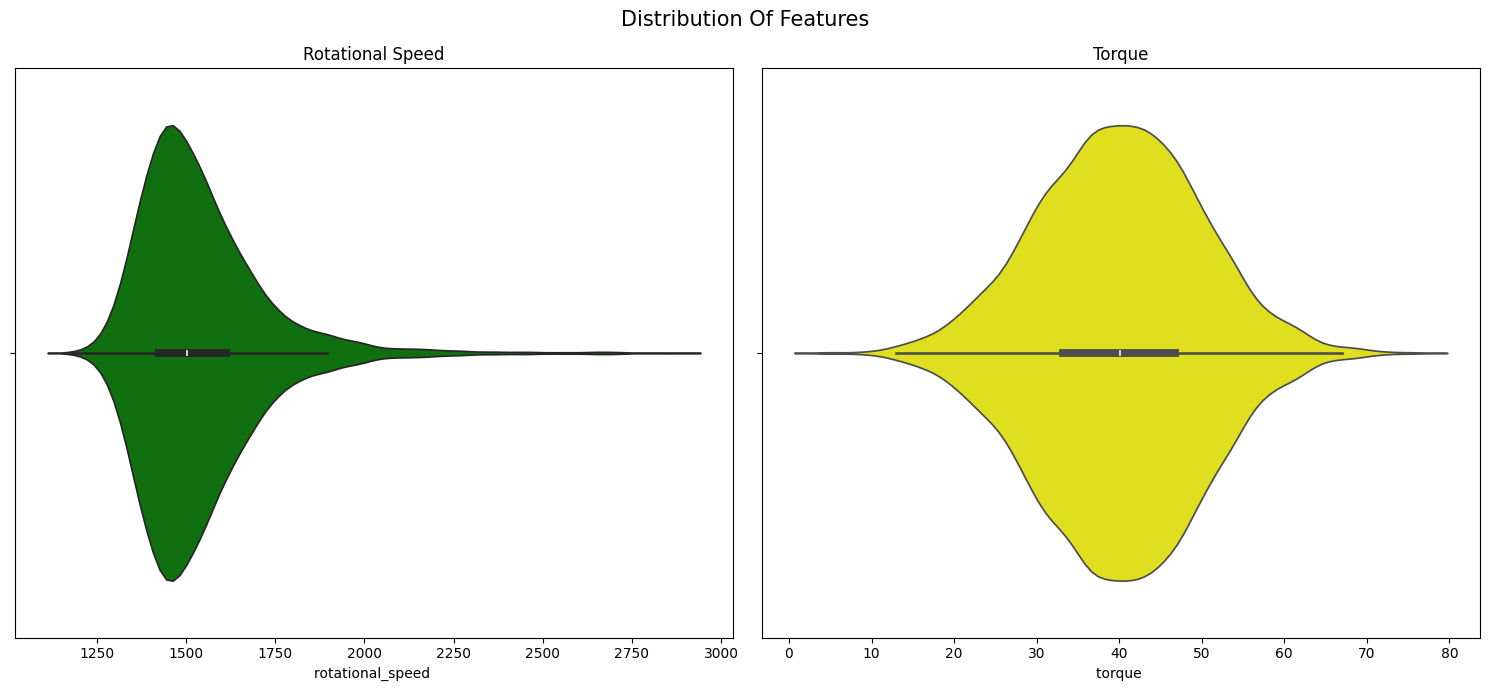

In [22]:
figure, axis = plt.subplots(1, 2, figsize=(15, 7))

figure.suptitle('Distribution Of Features', fontsize=15)

sns.violinplot(data=data, x='rotational_speed ', ax=axis[0], color='green')
axis[0].set_title('Rotational Speed')

sns.violinplot(data=data, x='torque ', ax=axis[1], color='yellow')
axis[1].set_title('Torque')

plt.tight_layout()

plt.show()

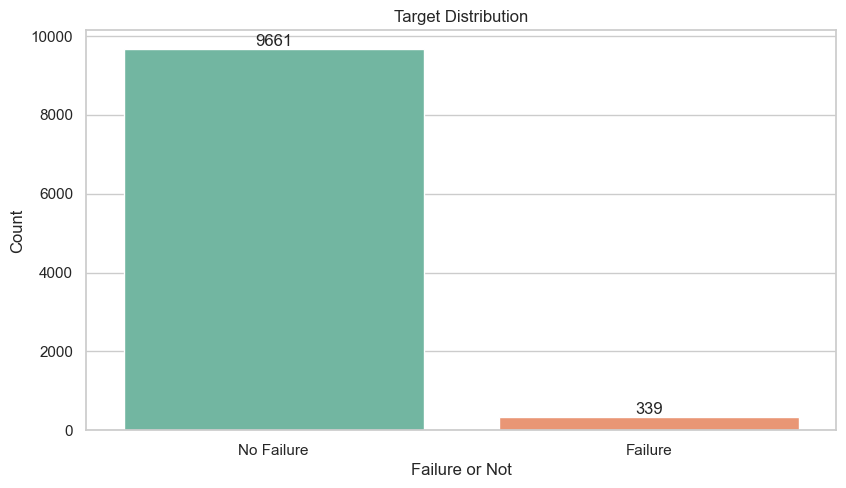

In [92]:
figure = plt.figure(figsize=(15,8), dpi= 100)
axis = sns.set_theme(style="whitegrid")
axis = figure.add_axes([0.1, 0.1, 0.5, 0.5])
axis = sns.countplot(data=data, x='target', palette="Set2")

for c in axis.containers:
    axis.bar_label(c)

axis.set_title('Target Distribution')
axis.set_xlabel('Failure or Not')
axis.set_ylabel('Count')
axis.set_xticklabels(['No Failure', 'Failure'])
plt.show()

In [24]:
data_failures = data[data['failure_type'] != "no_failure"]
failure_sorted = data_failures.groupby('failure_type')['target'].count().sort_values(ascending=False)
failure_sorted

failure_type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: target, dtype: int64

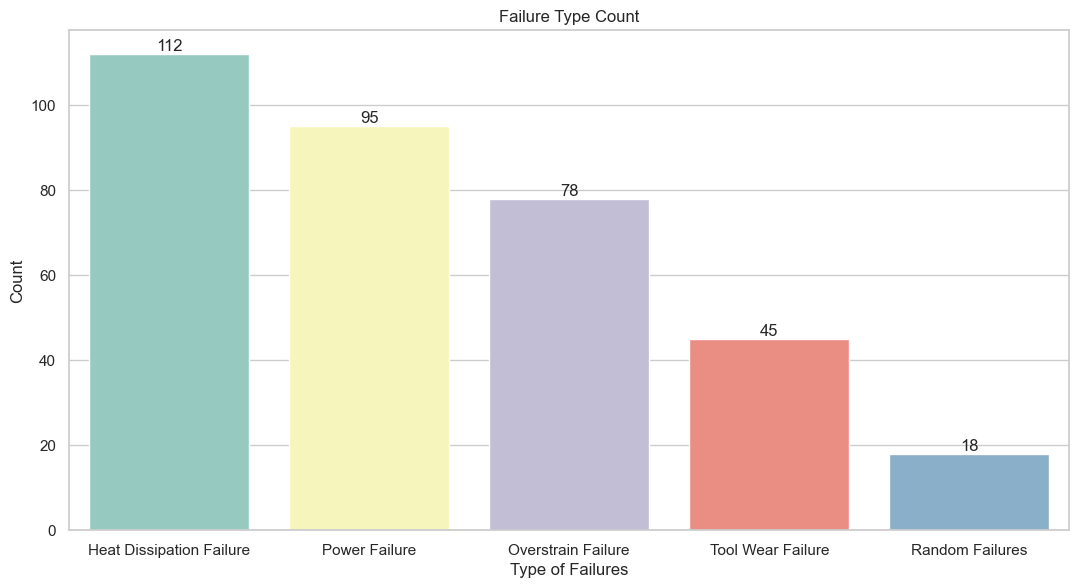

In [25]:
figure = plt.figure(figsize=(20,10), dpi= 100) 
axis = figure.add_axes([0.1, 0.1, 0.5, 0.5])

filtered_data = data[data['failure_type'] != 'No Failure']

failure_counts = filtered_data['failure_type'].value_counts()

axis = sns.barplot(data =failure_counts, palette="Set3")

for c in axis.containers:
    axis.bar_label(c)

plt.title('Failure Type Count')
plt.xlabel('Type of Failures')
plt.ylabel('Count')

plt.show()


<Figure size 1000x500 with 0 Axes>

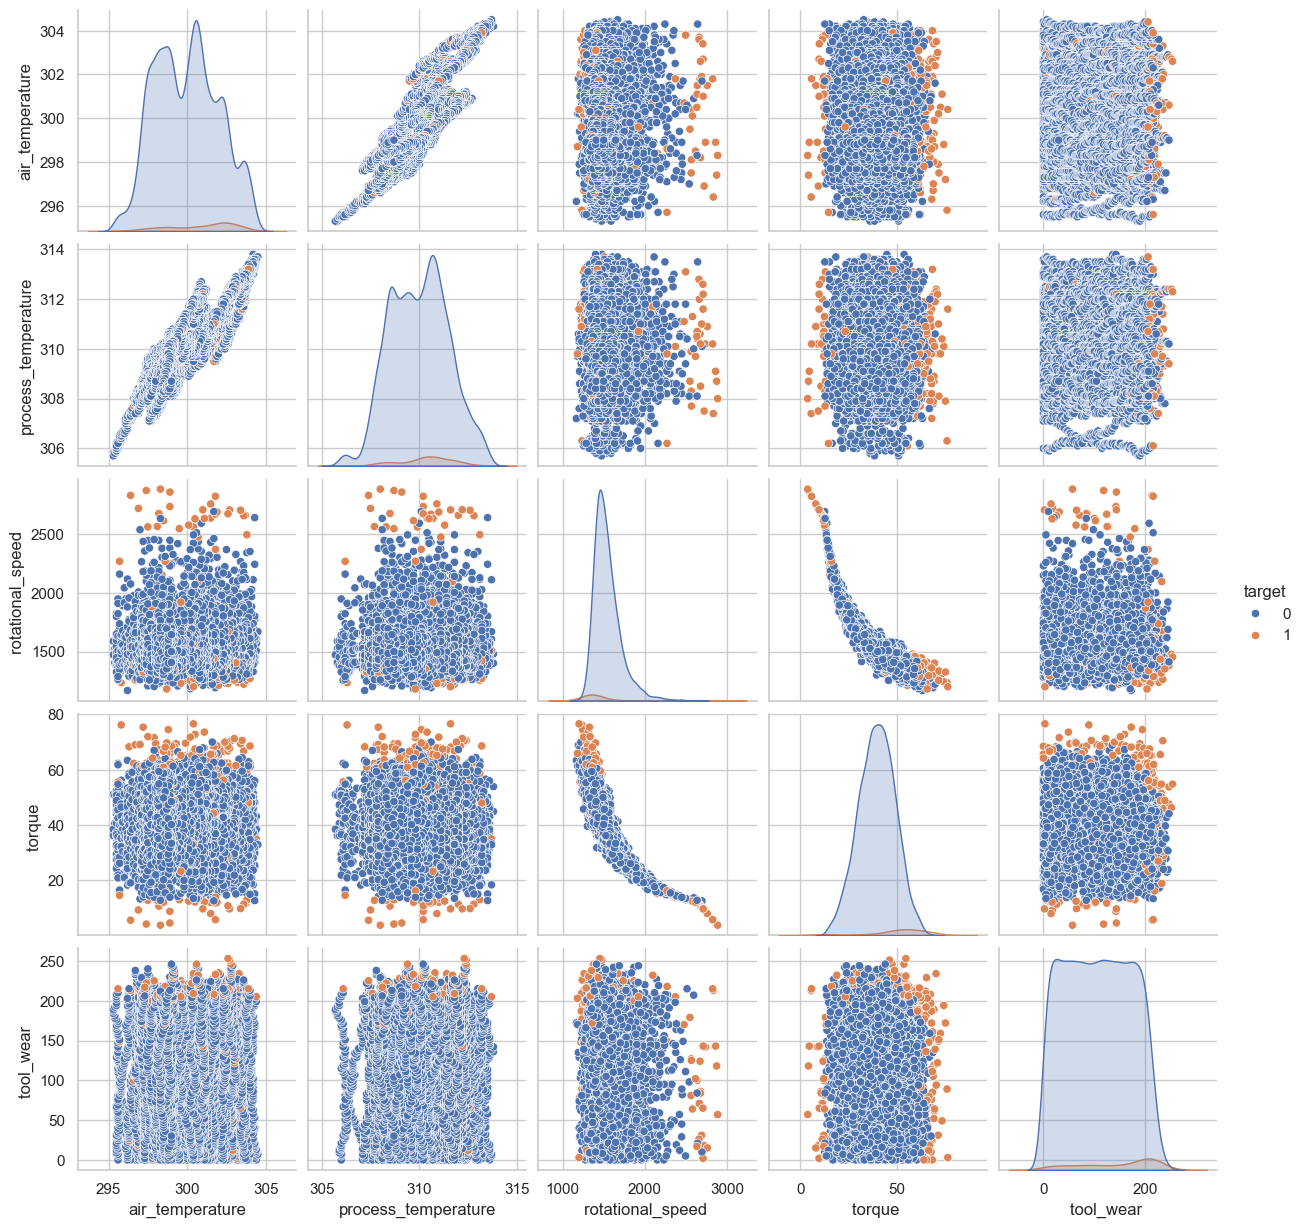

In [26]:
fig = plt.figure(figsize=(10,5), dpi= 100)
sns.pairplot(data, hue='target')
plt.show()

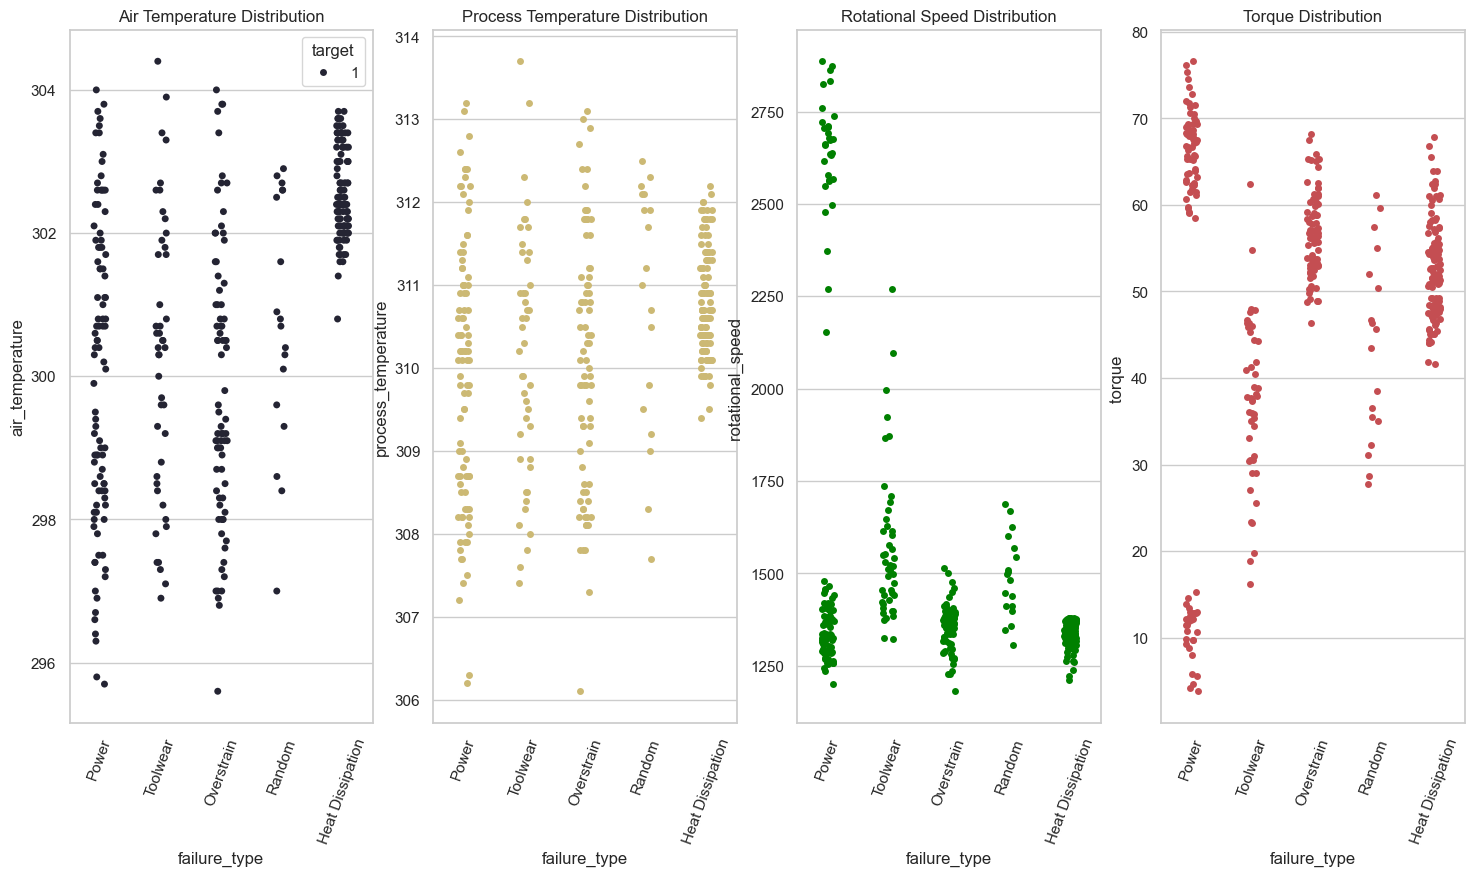

In [27]:
figure, axis = plt.subplots(1, 4, figsize=(18,9))

xticklabels = ['Power', 'Toolwear', 'Overstrain', 'Random', 'Heat Dissipation']

sns.stripplot(data=data.query('failure_type != "No Failure"'), x = 'failure_type', y = 'air_temperature', hue = 'target', color='blue', ax = axis[0])
axis[0].set_title('Air Temperature Distribution')
axis[0].set_xticklabels(xticklabels, rotation = 70)


sns.stripplot(data=data.query('failure_type != "No Failure"'), x='failure_type', y='process_temperature', color='y', ax=axis[1])
axis[1].set_title('Process Temperature Distribution')
axis[1].set_xticklabels(xticklabels, rotation = 70)


sns.stripplot(data=data.query('failure_type != "No Failure"'), x='failure_type', y='rotational_speed ', color='green', ax=axis[2])
axis[2].set_title('Rotational Speed Distribution')
axis[2].set_xticklabels(xticklabels, rotation = 70)


sns.stripplot(data=data.query('failure_type != "No Failure"'), x='failure_type', y='torque ', color='r', ax=axis[3])
axis[3].set_title('Torque Distribution')
axis[3].set_xticklabels(xticklabels, rotation = 70)

plt.show()

<Figure size 1500x1000 with 0 Axes>

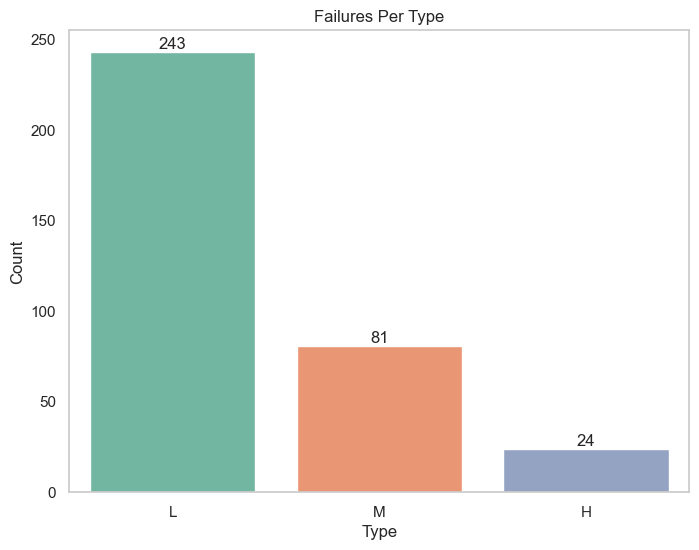

In [28]:
figure = plt.figure(figsize=(15,10))

filtered_data = data[data['target'] == 1]
type_counts = filtered_data['Type'].value_counts()

plt.figure(figsize=(8, 6))
axis = sns.barplot(data = type_counts, palette='Set2')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Failures Per Type')
for c in axis.containers:
    axis.bar_label(c)
    
plt.grid(False)
plt.show()

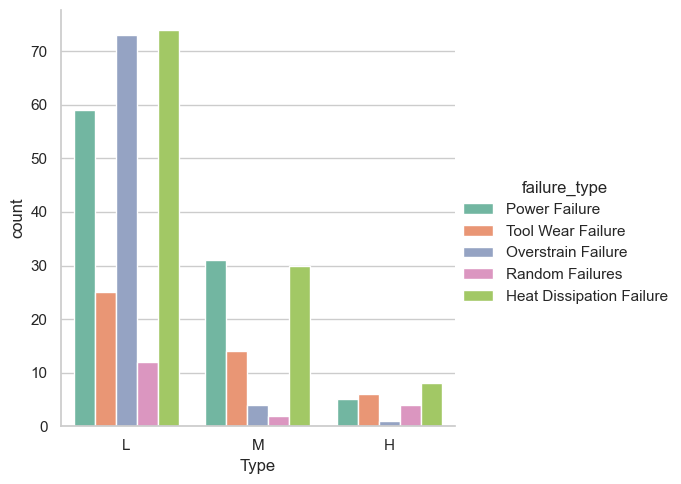

In [29]:
axis = sns.catplot(data= data.query("target == 1"), x='Type', palette="Set2", hue='failure_type', kind='count',order=['L', 'M', 'H'])
plt.show()

In [30]:
data['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [31]:
data_failured = data.query('failure_type != "No Failure"')

In [32]:
# Calculate counts of each type and failure counts for each type
type_counts = data['Type'].value_counts()
failure_counts = data_failured['Type'].value_counts()

failure_ratios = failure_counts / type_counts * 100

for type_code, failure_ratio in failure_ratios.items():
    print(f'Type {type_code} Failure Ratio: {failure_ratio:.2f} %')

Type L Failure Ratio: 4.05 %
Type M Failure Ratio: 2.70 %
Type H Failure Ratio: 2.39 %


In [33]:
from sklearn.utils import resample
failure = data[data['target'] == 1]
no_failure = data[data['target'] == 0]

no_failure_undersampled = resample(no_failure,n_samples= 348,random_state= 42)
data_resample = pd.concat([no_failure_undersampled, failure])

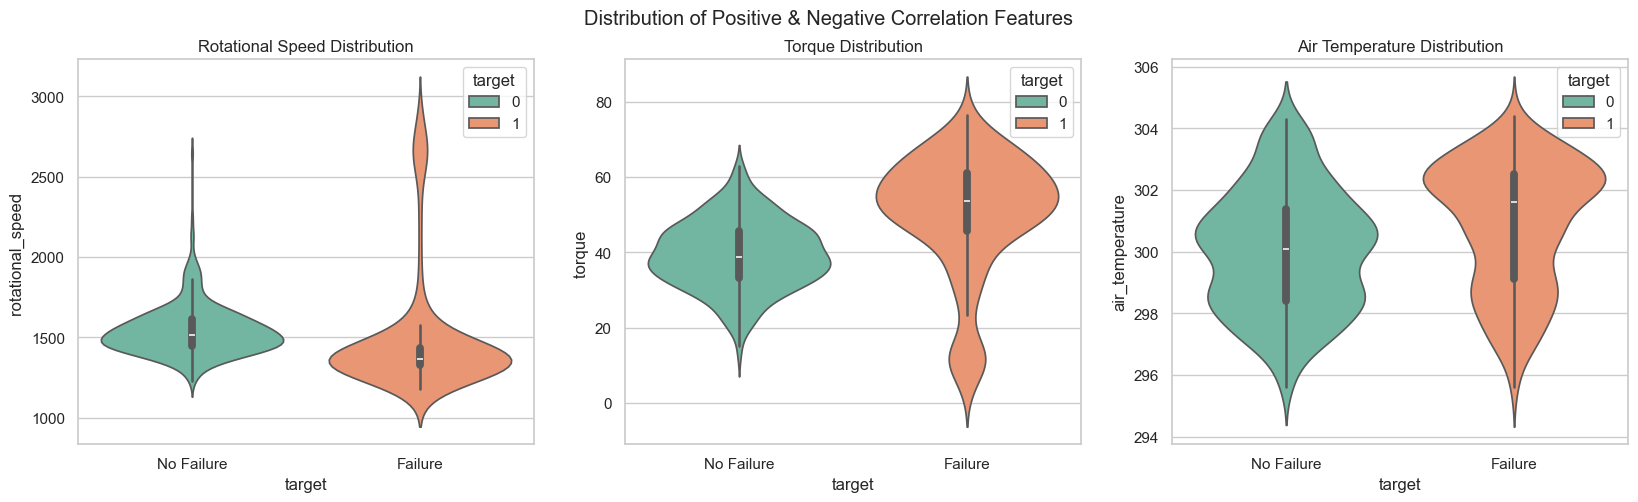

In [34]:
figure, axis = plt.subplots(1, 3, figsize=(20, 5))

figure.suptitle('Distribution of Positive & Negative Correlation Features')

sns.violinplot(data=data_resample, x='target', y='rotational_speed ', hue='target', palette='Set2', ax=axis[0])
axis[0].set_title('Rotational Speed Distribution')
axis[0].set_xticklabels(['No Failure', 'Failure'])

sns.violinplot(data=data_resample, x='target', y='torque ', hue='target', palette='Set2', ax=axis[1])
axis[1].set_title('Torque Distribution')
axis[1].set_xticklabels(['No Failure', 'Failure'])

sns.violinplot(data=data_resample, x='target', y='air_temperature', hue='target', palette='Set2', ax=axis[2])
axis[2].set_title('Air Temperature Distribution')
axis[2].set_xticklabels(['No Failure', 'Failure'])


plt.show()

In [35]:
# Calculate quartiles and interquartile range for 'rotational_speed'
rot_speed_failure = data_resample['rotational_speed '].loc[data_resample['target'] == 1].values
q25, q75 = np.percentile(rot_speed_failure, 25), np.percentile(rot_speed_failure, 75)
print('Quartile 25: {:.2f} | Quartile 75: {:.2f}'.format(q25, q75))
rot_speed_iqr = q75 - q25
print('IQR: {:.2f}'.format(rot_speed_iqr))

rot_speed_cut_off = rot_speed_iqr * 1.5
rot_speed_lower, rot_speed_upper = q25 - rot_speed_cut_off, q75 + rot_speed_cut_off
print('Cut Off: {:.2f}'.format(rot_speed_cut_off))
print('Rotational Speed Lower: {:.2f}'.format(rot_speed_lower))
print('Rotational Speed Upper: {:.2f}'.format(rot_speed_upper))

rot_speed_outliers = [x for x in rot_speed_failure if x < rot_speed_lower or x > rot_speed_upper]
print('Feature Rotational Speed Outliers for Failure Cases: {}'.format(len(rot_speed_outliers)))
print('percentage(%) of Rotational Speed Outliers for Failure Cases: {:.2f} %'.format(len(rot_speed_outliers) / len(data_resample) * 100))
print('-' * 238)

# Calculate quartiles and interquartile range for 'torque'
torque_failure = data_resample['torque '].loc[data_resample['target'] == 1].values
q25, q75 = np.percentile(torque_failure, 25), np.percentile(torque_failure, 75)
print('Quartile 25: {:.2f} | Quartile 75: {:.2f}'.format(q25, q75))
torque_iqr = q75 - q25
print('IQR: {:.2f}'.format(torque_iqr))

torque_cut_off = torque_iqr * 1.5
torque_lower, torque_upper = q25 - torque_cut_off, q75 + torque_cut_off
print('Cut Off: {:.2f}'.format(torque_cut_off))
print('Torque Lower: {:.2f}'.format(torque_lower))
print('Torque Upper: {:.2f}'.format(torque_upper))

torque_outliers = [x for x in torque_failure if x < torque_lower or x > torque_upper]
print('Torque Outliers for Failure Cases: {}'.format(len(torque_outliers)))
print('Percentage(%) of Torque Outliers for Failure Cases: {:.2f} %'.format(len(torque_outliers) / len(data_resample) * 100))
print('-' * 238)


Quartile 25: 1328.50 | Quartile 75: 1435.75
IQR: 107.25
Cut Off: 160.88
Rotational Speed Lower: 1167.62
Rotational Speed Upper: 1596.62
Feature Rotational Speed Outliers for Failure Cases: 50
percentage(%) of Rotational Speed Outliers for Failure Cases: 7.18 %
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: 45.65 | Quartile 75: 61.05
IQR: 15.40
Cut Off: 23.10
Torque Lower: 22.55
Torque Upper: 84.15
Torque Outliers for Failure Cases: 34
Percentage(%) of Torque Outliers for Failure Cases: 4.89 %
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [36]:
data_resample['rotational_speed '] = data_resample['rotational_speed '].replace(rot_speed_outliers,  np.median(data_resample['rotational_speed ']))
data_resample['torque '] = data_resample['torque '].replace(torque_outliers, np.median(data_resample['torque ']))

Feature Engineering

In [37]:
data['Type'] = data['Type'].astype('str')
data['failure_type'] = data['failure_type'].astype('str')

In [38]:
x = data.drop(['target', 'failure_type',], axis= 1).copy()
y = data['target'].copy()

In [39]:
data_encoded = pd.get_dummies(x, columns=['Type'], drop_first=True, prefix='Type')
data_encoded.head()

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,False,True
1,298.2,308.7,1408,46.3,3,True,False
2,298.1,308.5,1498,49.4,5,True,False
3,298.2,308.6,1433,39.5,7,True,False
4,298.2,308.7,1408,40.0,9,True,False


In [40]:
cor_mat = data_encoded.corr()
cor_mat

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Type_L,Type_M
air_temperature,1.000000,0.876107,0.022670,-0.013778,0.013853,0.006676,0.007958
process_temperature,0.876107,1.000000,0.019277,-0.014061,0.013488,0.005564,0.005831
rotational_speed,0.022670,0.019277,1.000000,-0.875027,0.000223,0.004735,-0.004296
torque,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.001191,0.001991
tool_wear,0.013853,0.013488,0.000223,-0.003093,1.000000,0.008232,-0.006976
Type_L,0.006676,0.005564,0.004735,0.001191,0.008232,1.000000,-0.801211
Type_M,0.007958,0.005831,-0.004296,0.001991,-0.006976,-0.801211,1.000000


In [41]:
y.value_counts(normalize= True)

target
0    0.9652
1    0.0348
Name: proportion, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [43]:
x_train, x_test, y_train, y_test = train_test_split(data_encoded, y,test_size=0.3, random_state= 42)

In [93]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [94]:
os = RandomOverSampler()
x_train_os, y_train_os = os.fit_resample(x_train, y_train)

print('before : {}'.format(Counter(y_train)))
print('after : {}'.format(Counter(y_train_os)))

before : Counter({0: 6749, 1: 251})
after : Counter({0: 6749, 1: 6749})


Modelling

In [70]:
from sklearn.linear_model import LogisticRegression

classifiers = {"logistic Regression":LogisticRegression(),"Navie bayes Classifier":GaussianNB(),"Support Vector Classifier": SVC(),"KNearest Neighbors": KNeighborsClassifier()}

for name, classifier in classifiers.items():
    classifier.fit(x_train_os, y_train_os)
    scores = cross_val_score(classifier, x_train_os, y_train_os, cv=5)
    print(f"{name}:  {scores.mean():.4f} accuracy")


logistic Regression:  0.8175 accuracy
Navie bayes Classifier:  0.8162 accuracy
Support Vector Classifier:  0.9261 accuracy
KNearest Neighbors:  0.9761 accuracy


Logistic Regression

In [71]:
l1_space = np.linspace(0, 1, 30)

logreg_param = [{'C': [0.01, 0.1, 0.5, 10],
              'penalty':['l1', 'l2'],
              'l1_ratio': l1_space}]

In [72]:
logreg_grid = GridSearchCV(LogisticRegression(), logreg_param,cv= 5)
logreg_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.01, 0.1, 0.5, 10],
                          'l1_ratio': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
                          'penalty': ['l1', 'l2']}])

In [73]:
logreg_ypred = logreg_grid.predict(x_test)
logreg_yprob = logreg_grid.predict_proba(x_test)

In [74]:
print("Logistic Regression Best parameters are :{}".format(logreg_grid.best_params_))
print("Logistic Regression Cross validation score is :{}".format(logreg_grid.best_score_))
print("Precision best score is :{:.4f}".format(precision_score(y_test,logreg_ypred)))
print("Recall best score is :{:.4f}".format(recall_score(y_test,logreg_ypred)))
print("Confusion matrix :\n",confusion_matrix(y_test,logreg_ypred))

Logistic Regression Best parameters are :{'C': 10, 'l1_ratio': 0.0, 'penalty': 'l2'}
Logistic Regression Cross validation score is :0.9677142857142857
Precision best score is :0.6923
Recall best score is :0.2784
Confusion matrix :
 [[2891   12]
 [  70   27]]


K Nears Neighbour

In [75]:
knn_param = [{"n_neighbors": np.arange(25, 30),
               'algorithm': ['auto', 'ball_tree']}]

In [76]:
knn_grid = GridSearchCV(KNeighborsClassifier(),knn_param,cv= 5)
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree'],
                          'n_neighbors': array([25, 26, 27, 28, 29])}])

In [77]:
knn_ypred = knn_grid.predict(x_test)
knn_yprob = knn_grid.predict_proba(x_test)

In [78]:
print("KNN Best parameters are :{}".format(knn_grid.best_params_))
print("KNN Cross validation score is :{}".format(knn_grid.best_score_))
print("Precision best score is :{:.4f}".format(precision_score(y_test,knn_ypred)))
print("Recall best score is :{:.4f}".format(recall_score(y_test,knn_ypred)))
print("Confusion matrix :\n",confusion_matrix(knn_ypred,y_test))

KNN Best parameters are :{'algorithm': 'auto', 'n_neighbors': 25}
KNN Cross validation score is :0.9661428571428571
Precision best score is :0.9167
Recall best score is :0.1134
Confusion matrix :
 [[2902   86]
 [   1   11]]


Navie Bayes Classifier

In [79]:
nb_param = [{'var_smoothing': np.logspace(-10, -1, 10)}]

In [80]:
nb_grid = GridSearchCV(GaussianNB(),nb_param,cv= 5)
nb_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid=[{'var_smoothing': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01])}])

In [81]:
nb_ypred = nb_grid.predict(x_test)
nb_yprob = nb_grid.predict_proba(x_test)

In [82]:
print("Navie Bayes Classifier Best parameters are :{}".format(nb_grid.best_params_))
print("Navie Bayes Classifier Cross validation score is :{}".format(nb_grid.best_score_))
print("Precision best score is :{:.4f}".format(precision_score(y_test,nb_ypred)))
print("Recall best score is :{:.4f}".format(recall_score(y_test,nb_ypred)))
print("Confusion matrix :\n",confusion_matrix(nb_ypred,y_test))

Navie Bayes Classifier Best parameters are :{'var_smoothing': 0.1}
Navie Bayes Classifier Cross validation score is :0.9597142857142856
Precision best score is :0.3750
Recall best score is :0.1546
Confusion matrix :
 [[2878   82]
 [  25   15]]


Support Vector Classifier

In [83]:
svm_param = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'scale'],
    'kernel': ['linear', 'rbf'],
     'probability': [True]}

In [84]:
svm_grid = GridSearchCV(SVC(),svm_param,cv=5)
svm_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale'],
                         'kernel': ['linear', 'rbf'], 'probability': [True]})

In [85]:
svm_ypred = svm_grid.predict(x_test)
svm_yprob = svm_grid.predict_proba(x_test)

In [86]:
print("SVM Best parameters are :{}".format(svm_grid.best_params_))
print("SVM Cross validation score is :{}".format(svm_grid.best_score_))
print("Precision best score is :{:.4f}".format(precision_score(y_test,svm_ypred)))
print("Recall best score is :{:.4f}".format(recall_score(y_test,svm_ypred)))
print("Confusion matrix :\n",confusion_matrix(y_test,svm_ypred))

SVM Best parameters are :{'C': 10, 'gamma': 1, 'kernel': 'rbf', 'probability': True}
SVM Cross validation score is :0.979857142857143
Precision best score is :0.7662
Recall best score is :0.6082
Confusion matrix :
 [[2885   18]
 [  38   59]]


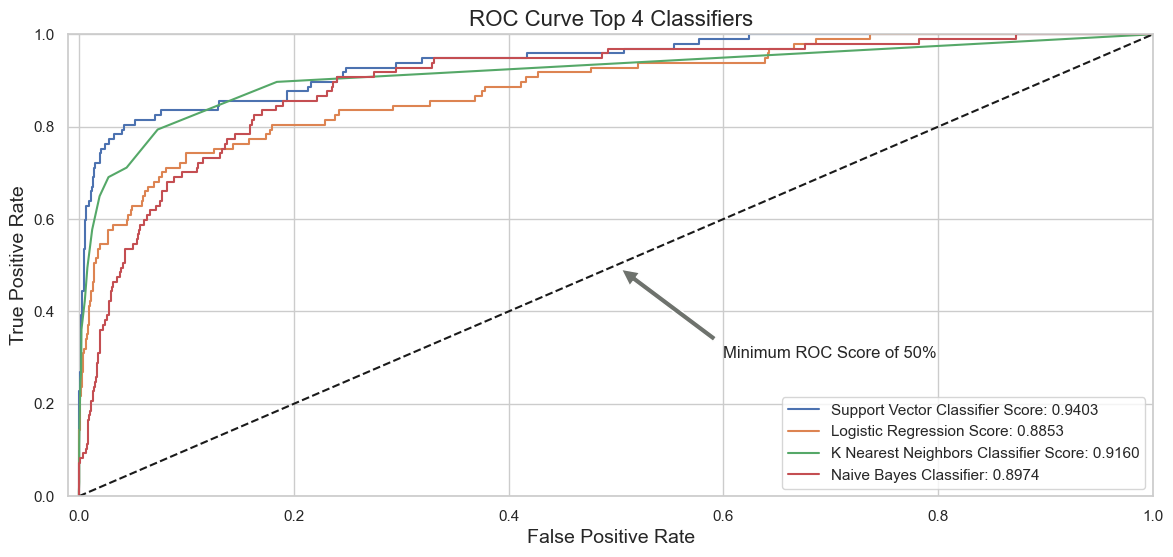

In [87]:
falsepr_svm, truepr_svm, threshold_svm = roc_curve(y_test, svm_yprob[:,1])
falsepr_logreg, truepr_logreg, threshold_logreg = roc_curve(y_test, logreg_yprob[:,1])
falsepr_knn, truepr_knn, threshold_knn = roc_curve(y_test, knn_yprob[:,1])
falsepr_nb, truepr_nb, threshold_nb = roc_curve(y_test, nb_yprob[:,1])

def plot_roc_curve_multiple(falsepr_svm, truepr_svm, falsepr_logreg, truepr_logreg, falsepr_knn, truepr_knn, falsepr_nb, truepr_nb):
    plt.figure(figsize=(14, 6))
    plt.title('ROC Curve Top 4 Classifiers', fontsize=16)
    plt.plot(falsepr_svm, truepr_svm, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svm_yprob[:, 1])))
    plt.plot(falsepr_logreg, truepr_logreg, label='Logistic Regression Score: {:.4f}'.format(roc_auc_score(y_test, logreg_yprob[:, 1])))
    plt.plot(falsepr_knn, truepr_knn, label='K Nearest Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knn_yprob[:, 1])))
    plt.plot(falsepr_nb, truepr_nb, label='Naive Bayes Classifier: {:.4f}'.format(roc_auc_score(y_test, nb_yprob[:, 1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.annotate('Minimum ROC Score of 50%', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
    plt.legend()

plot_roc_curve_multiple(falsepr_svm, truepr_svm, falsepr_logreg, truepr_logreg, falsepr_knn, truepr_knn, falsepr_nb, truepr_nb)
plt.show()


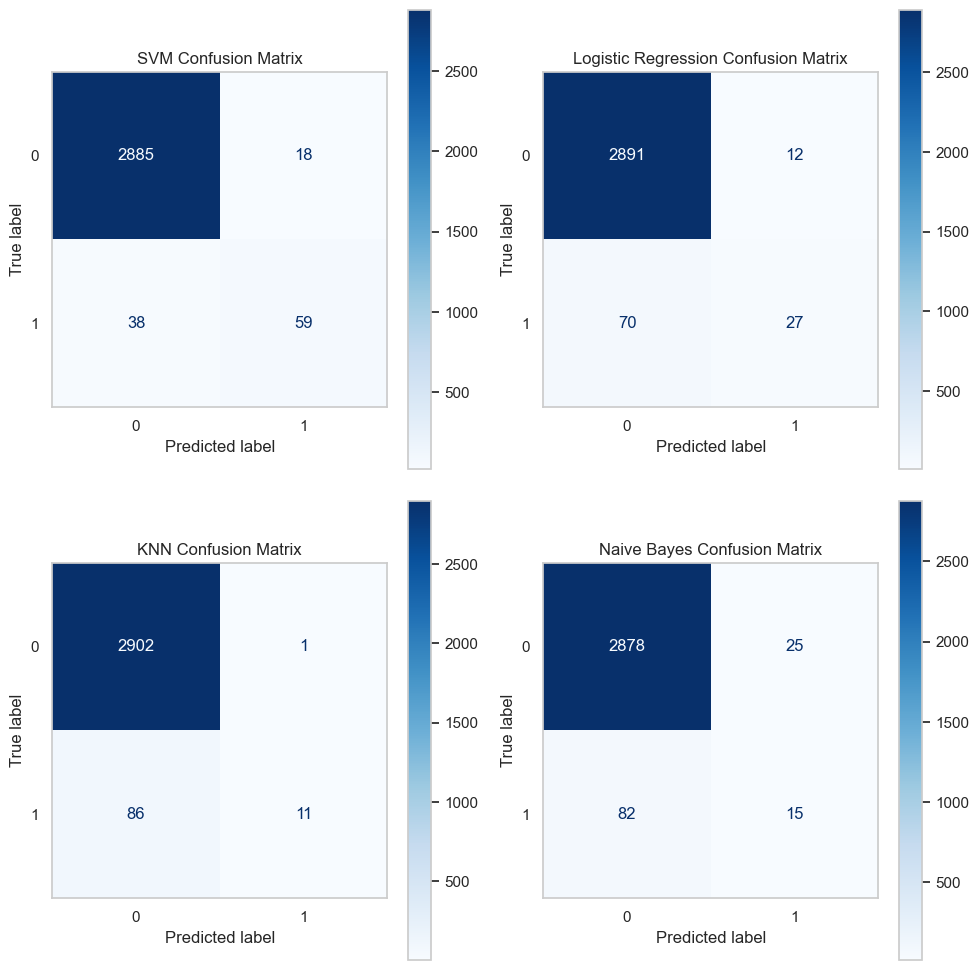

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
svm_display = ConfusionMatrixDisplay.from_estimator(svm_grid, x_test, y_test, cmap='Blues', ax=axs[0, 0])
svm_display.ax_.set_title('SVM Confusion Matrix')

logreg_display = ConfusionMatrixDisplay.from_estimator(logreg_grid, x_test, y_test, cmap='Blues', ax=axs[0, 1])
logreg_display.ax_.set_title('Logistic Regression Confusion Matrix')

knn_display = ConfusionMatrixDisplay.from_estimator(knn_grid, x_test, y_test, cmap='Blues', ax=axs[1, 0])
knn_display.ax_.set_title('KNN Confusion Matrix')

nb_display = ConfusionMatrixDisplay.from_estimator(nb_grid, x_test, y_test, cmap='Blues', ax=axs[1, 1])
nb_display.ax_.set_title('Naive Bayes Confusion Matrix')

for ax in axs.flat:
    ax.grid(False)

plt.tight_layout()

plt.show()


In [89]:
new_pred = [[900.6,800.3, 1830,	62.4,3,False,True]]

In [90]:
new_val = knn_grid.predict(new_pred)
new_val

array([1])